In [1]:
import logging
import warnings

# Suprimir avisos específicos de FutureWarning e UserWarning
warnings.filterwarnings("ignore", category=FutureWarning, message=".*TRANSFORMERS_CACHE.*")
warnings.filterwarnings("ignore", message=".*resume_download.*deprecated.*", category=FutureWarning)
warnings.filterwarnings("ignore", message=".*use_cache=True.*", category=UserWarning)
warnings.filterwarnings("ignore", message=".*use_reentrant parameter should be passed explicitly.*", category=UserWarning)
warnings.filterwarnings("ignore", message="torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly.")


# Configurar o nível de log para a biblioteca transformers
logging.getLogger("transformers.trainer").setLevel(logging.WARNING)
logging.getLogger("transformers.trainer_utils").setLevel(logging.WARNING)
logging.getLogger("transformers.training_args").setLevel(logging.WARNING)

In [2]:
def install_lib(libname):
    print(f">>> {libname}")
    get_ipython().system(f"pip install -qqq {libname}")

libs = [
    "diffusers",
]

for lib in libs:
    install_lib(lib)

>>> diffusers


# Teste 1

In [2]:
from diffusers import StableDiffusionPipeline

In [3]:
pipe = StableDiffusionPipeline.from_pretrained('CompVis/stable-diffusion-v1-4').to('cuda')

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

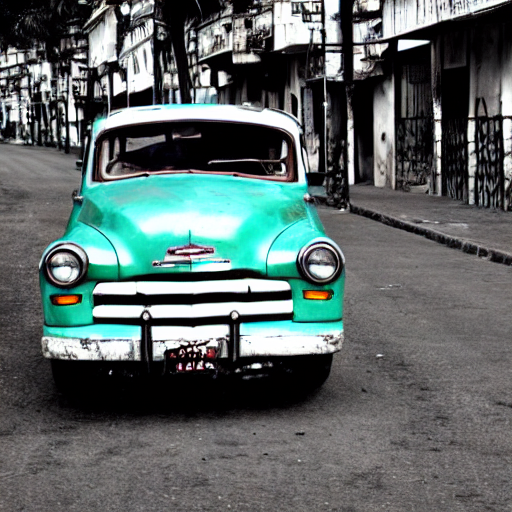

In [20]:
# Initialize a prompt
prompt = "old car in rio de janeiro"
# Pass the prompt in the pipeline
pipe(prompt).images[0]

# Teste 2

In [5]:
import torch
from diffusers import StableDiffusion3Pipeline

pipe = StableDiffusion3Pipeline.from_pretrained("stabilityai/stable-diffusion-3-medium-diffusers", torch_dtype=torch.float16, )
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

TypeError: couldn't find storage object Float8_e4m3fnStorage

# Teste 3

In [3]:
!pip install invisible_watermark transformers accelerate safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.9 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 8.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 8.7 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
from diffusers import StableDiffusionXLImg2ImgPipeline
from diffusers.utils import load_image

pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

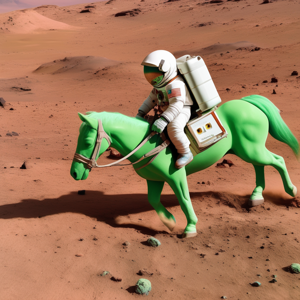

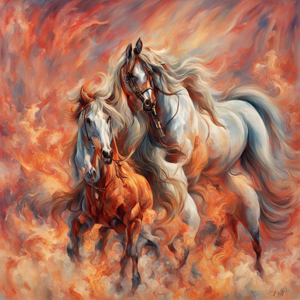

In [28]:

url = "https://huggingface.co/datasets/patrickvonplaten/images/resolve/main/aa_xl/000000009.png"

init_image = load_image(url).convert("RGB")
prompt = "a fire horse on a blue ground"
prompt_2 = None
image = pipe(prompt, prompt_2=prompt_2, image=init_image, strength=0.8, num_inference_steps=100).images


size = (300,300)
display(init_image.resize(size))
display(image[0].resize(size))